# Практика 6

##Библиотеки

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

#2
from sklearn.preprocessing import StandardScaler

#3
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#4
from sklearn.cluster import DBSCAN

### 1

In [386]:
clusterwine = pd.read_csv('C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\Pr6\\wine.csv')

In [387]:
clusterwine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [388]:
clusterwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [389]:
clusterwine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### 2. Провести кластеризацию данных с помощью алгоритма k-means

In [390]:
# Нормализация данных
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clusterwine)

In [391]:
# "правило локтя"
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)


C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

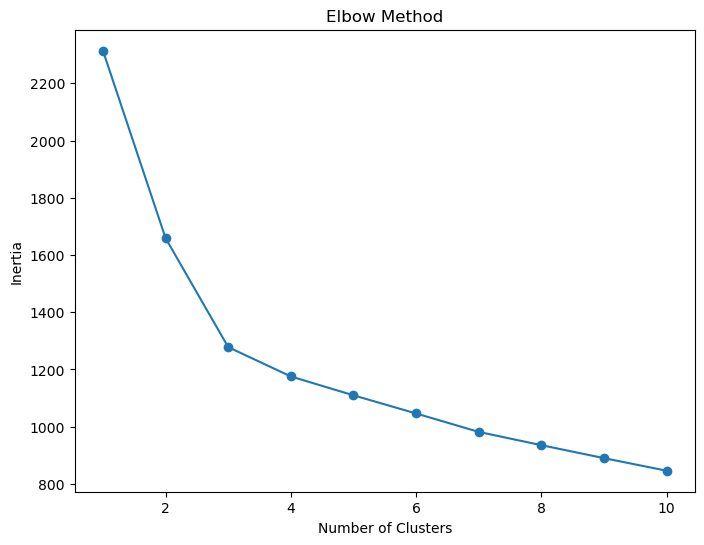

In [392]:
# Постройте график "правила локтя"
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [393]:
#коэффициент силуэта для оценки качества кластеризации
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    silhouette_scores.append(silhouette_score(normalized_data, kmeans.labels_))

C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

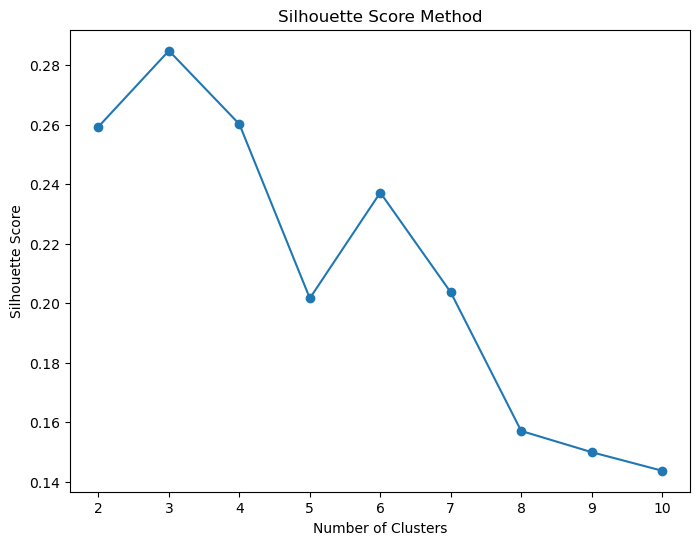

In [394]:
#график коэффициента силуэта
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

На графиках вы будете искать точку, где происходит "излом" (это может быть точка, где сумма квадратов расстояний уменьшается медленнее). Это может быть оптимальным числом кластеров согласно "правилу локтя". Также, более высокие значения коэффициента силуэта указывают на лучшую кластеризацию. Поэтому, оптимальное число кластеров может быть выбрано, учитывая оба метода и осмотрев графики.

### 3 Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

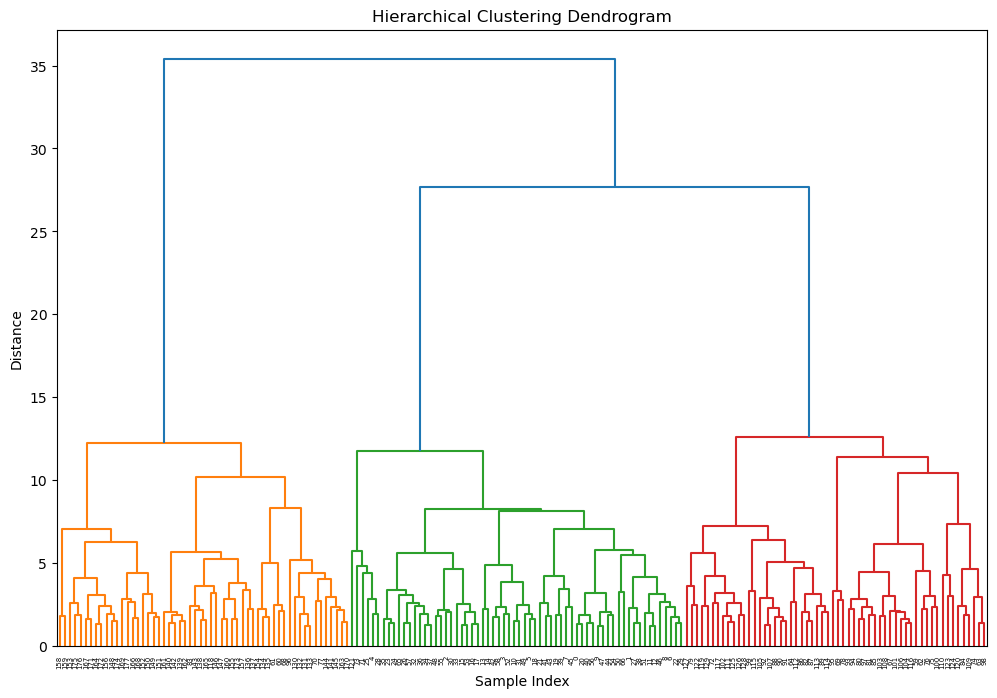

In [395]:
linkage_matrix = linkage(normalized_data, method='ward')

# Построение дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [396]:
# Выбор оптимального числа кластеров (может потребоваться интерпретация дендрограммы)
# Один из способов - отрезать дерево на определенной высоте и определить число кластеров
# Например, можно использовать функцию fcluster:
from scipy.cluster.hierarchy import fcluster
max_d = 13  # Задайте максимальное расстояние для отсечения
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

In [397]:
# Добавьте информацию о кластерах в ваш датасет
clusterwine['IRACluster'] = clusters

# Выведите результаты кластеризации
print(clusterwine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  IRACluster  
0   3.92     1065           2  
1   3.40     1050           

### 4. Провести кластеризацию данных с помощью алгоритма DBSCAN.

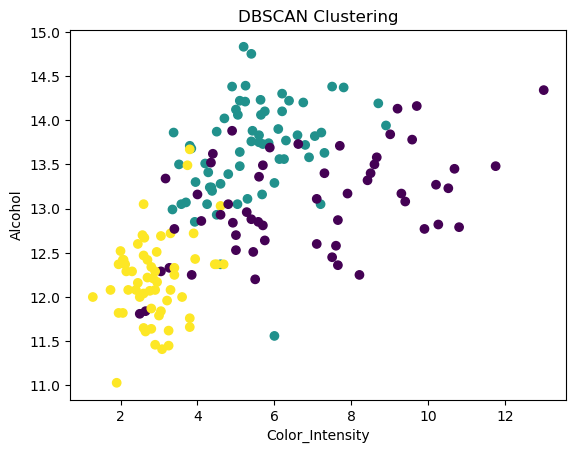

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  IRACluster  ClusterDBSCAN  
0   3.92     1065           2              0 

In [398]:
# DBSCAN
# Выбор параметров: epsilon (радиус окрестности) и min_samples (минимальное количество точек в окрестности)
epsilon = 3 # Задайте значение ваших предпочтений
min_samples = 3 # Задайте значение ваших предпочтений

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
DBSclusters = dbscan.fit_predict(normalized_data)

# Добавьте информацию о кластерах в ваш датасет
clusterwine['ClusterDBSCAN'] = DBSclusters

# Визуализация результатов (если у вас есть два признака, и вы хотите построить scatter plot)
plt.scatter(clusterwine['Color_Intensity'], clusterwine['Alcohol'], c=clusterwine['IRACluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Color_Intensity')
plt.ylabel('Alcohol')
plt.show()

print(clusterwine.head())

C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grman\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


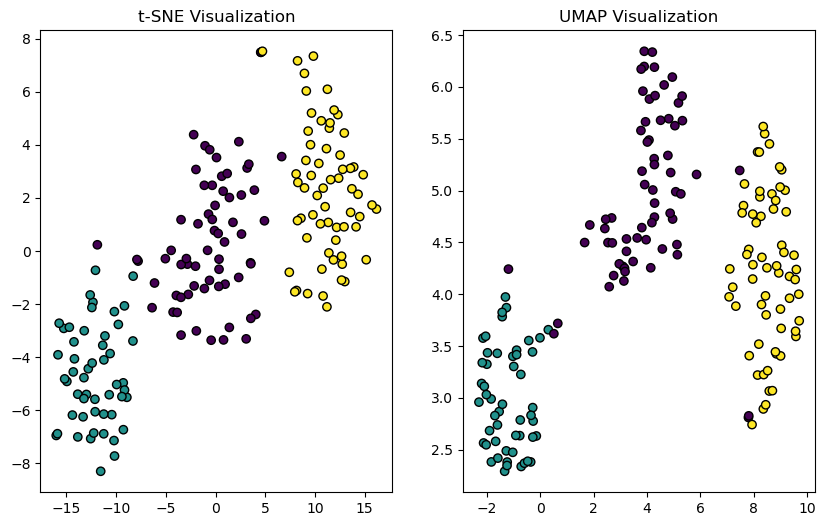

In [400]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Добавьте информацию о кластерах в ваш датасет
clusterwine['Cluster'] = clusters

# Визуализация с t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)

# Визуализация с UMAP
umap_result = umap.UMAP().fit_transform(normalized_data)

# Трехмерный точечный график (если у вас есть трехмерные данные)
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusterwine['Cluster'], cmap='viridis', edgecolors='k')
ax1.set_title('t-SNE Visualization')

ax2 = fig.add_subplot(122)
ax2.scatter(umap_result[:, 0], umap_result[:, 1], c=clusterwine['Cluster'], cmap='viridis', edgecolors='k')
ax2.set_title('UMAP Visualization')

plt.show()

# Трехмерный точечный график
if len(clusterwine.columns) == 4:  # Предполагаем, что у вас есть три признака и один столбец для кластеров
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(clusterwine.iloc[:, 0], clusterwine.iloc[:, 1],clusterwine.iloc[:, 2], c=clusterwine['Cluster'], cmap='viridis', edgecolors='k')
    ax.set_title('3D Scatter Plot')
    plt.show()